In [46]:
import pandas as pd 
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt
import requests


In [47]:
df=pd.read_csv('clean.csv')
print(df.shape)
df.head()

(7425, 9)


,link,price,area,room,toilet,address,quan,loai_bds,price-VND
0,https://mogi.vn/quan-lien-chieu/mua-dat-nen-du...,NaN,100,0,0,"Nguyễn Tất Thành, Phường Hoà Hiệp Nam, Quận Li...",quan-lien-chieu,mua-dat-nen-du-an/,0
1,https://mogi.vn/quan-lien-chieu/mua-dat-nen-du...,NaN,100,0,0,"Nguyễn Lương Bằng, Phường Hoà Hiệp Nam, Quận L...",quan-lien-chieu,mua-dat-nen-du-an/,0
2,https://mogi.vn/quan-hai-chau/mua-nha-mat-tien...,100.000 đ,120,4,5,"Bạch Đằng, Phường Hải Châu I, Quận Hải Châu, Đ...",quan-hai-chau,mua-nha-mat-tien-pho/,100
3,https://mogi.vn/quan-hai-chau/mua-nha-biet-thu...,100.000 đ,120,4,6,"Hoá Sơn 10, Phường Hòa Cường Nam, Quận Hải Châ...",quan-hai-chau,mua-nha-biet-thu-lien-ke/,100
4,https://mogi.vn/quan-son-tra/mua-nha-mat-tien-...,105.000 đ,81,7,7,"Thạch Lam, Phường Phước Mỹ, Quận Sơn Trà, Đà Nẵng",quan-son-tra,mua-nha-mat-tien-pho/,105


In [48]:
unique_quan = df['quan'].unique()
print(unique_quan)
unique_loai_bds = df['loai_bds'].unique()
print(unique_loai_bds)

['quan-lien-chieu' 'quan-hai-chau' 'quan-son-tra' 'quan-cam-le'
 'quan-thanh-khe' 'quan-ngu-hanh-son' 'huyen-hoa-vang']
['mua-dat-nen-du-an/' 'mua-nha-mat-tien-pho/' 'mua-nha-biet-thu-lien-ke/'
 'mua-can-ho-chung-cu/' 'mua-dat-tho-cu/' 'mua-nha-hem-ngo/'
 'mua-can-ho-dich-vu/' 'mua-mat-bang-cua-hang-shop-nhieu-muc-dich/'
 'mua-duong-noi-bo/' 'mua-can-ho-tap-the-cu-xa/'
 'mua-mat-bang-cua-hang-shop-cafe-do-uong/' 'mua-can-ho-penthouse/'
 'mua-dat-kho-xuong/' 'mua-dat-nong-nghiep/'
 'mua-cua-hang-shop-shophouse/' 'mua-dat/' 'mua-can-ho-officetel/']


In [49]:
df['quan-code'] = pd.Categorical(df['quan'])
print(df['quan-code'].cat.categories)
df['quan-code'] = df['quan-code'].cat.codes
df['loai_bds-code'] = pd.Categorical(df['loai_bds'])
print(df['loai_bds-code'].cat.categories)
df['loai_bds-code'] = df['loai_bds-code'].cat.codes
df

Index(['huyen-hoa-vang', 'quan-cam-le', 'quan-hai-chau', 'quan-lien-chieu',
       'quan-ngu-hanh-son', 'quan-son-tra', 'quan-thanh-khe'],
      dtype='object')
Index(['mua-can-ho-chung-cu/', 'mua-can-ho-dich-vu/', 'mua-can-ho-officetel/',
       'mua-can-ho-penthouse/', 'mua-can-ho-tap-the-cu-xa/',
       'mua-cua-hang-shop-shophouse/', 'mua-dat-kho-xuong/',
       'mua-dat-nen-du-an/', 'mua-dat-nong-nghiep/', 'mua-dat-tho-cu/',
       'mua-dat/', 'mua-duong-noi-bo/',
       'mua-mat-bang-cua-hang-shop-cafe-do-uong/',
       'mua-mat-bang-cua-hang-shop-nhieu-muc-dich/',
       'mua-nha-biet-thu-lien-ke/', 'mua-nha-hem-ngo/',
       'mua-nha-mat-tien-pho/'],
      dtype='object')


,link,price,area,room,toilet,address,quan,loai_bds,price-VND,quan-code,loai_bds-code
0,https://mogi.vn/quan-lien-chieu/mua-dat-nen-du...,NaN,100,0,0,"Nguyễn Tất Thành, Phường Hoà Hiệp Nam, Quận Li...",quan-lien-chieu,mua-dat-nen-du-an/,0,3,7
1,https://mogi.vn/quan-lien-chieu/mua-dat-nen-du...,NaN,100,0,0,"Nguyễn Lương Bằng, Phường Hoà Hiệp Nam, Quận L...",quan-lien-chieu,mua-dat-nen-du-an/,0,3,7
2,https://mogi.vn/quan-hai-chau/mua-nha-mat-tien...,100.000 đ,120,4,5,"Bạch Đằng, Phường Hải Châu I, Quận Hải Châu, Đ...",quan-hai-chau,mua-nha-mat-tien-pho/,100,2,16
3,https://mogi.vn/quan-hai-chau/mua-nha-biet-thu...,100.000 đ,120,4,6,"Hoá Sơn 10, Phường Hòa Cường Nam, Quận Hải Châ...",quan-hai-chau,mua-nha-biet-thu-lien-ke/,100,2,14
4,https://mogi.vn/quan-son-tra/mua-nha-mat-tien-...,105.000 đ,81,7,7,"Thạch Lam, Phường Phước Mỹ, Quận Sơn Trà, Đà Nẵng",quan-son-tra,mua-nha-mat-tien-pho/,105,5,16
...,...,...,...,...,...,...,...,...,...,...,...
7420,https://mogi.vn/quan-hai-chau/mua-nha-mat-tien...,5500 tỷ,76,3,2,"Nguyễn Thi, Phường Hòa Cường Nam, Quận Hải Châ...",quan-hai-chau,mua-nha-mat-tien-pho/,5500000000000,2,16
7421,https://mogi.vn/quan-cam-le/mua-nha-mat-tien-p...,6992 tỷ,92,3,2,"Tú Mỡ, Phường Hòa An, Quận Cẩm Lệ, Đà Nẵng",quan-cam-le,mua-nha-mat-tien-pho/,6992000000000,1,16
7422,https://mogi.vn/quan-thanh-khe/mua-nha-mat-tie...,7800 tỷ,100,4,2,"Thanh Huy 1, Phường Thanh Khê Đông, Quận Thanh...",quan-thanh-khe,mua-nha-mat-tien-pho/,7800000000000,6,16
7423,https://mogi.vn/quan-ngu-hanh-son/mua-nha-mat-...,14798 tỷ,151,3,2,"Nguyễn Văn Thoại, Phường Mỹ An, Quận Ngũ Hành ...",quan-ngu-hanh-son,mua-nha-mat-tien-pho/,14798000000000,4,16


In [50]:
df['price-per-m2'] = df['price-VND'] / df['area']
print(df.isna().sum())
df

link             0
price            2
area             0
room             0
toilet           0
address          0
quan             0
loai_bds         0
price-VND        0
quan-code        0
loai_bds-code    0
price-per-m2     0
dtype: int64


,link,price,area,room,toilet,address,quan,loai_bds,price-VND,quan-code,loai_bds-code,price-per-m2
0,https://mogi.vn/quan-lien-chieu/mua-dat-nen-du...,NaN,100,0,0,"Nguyễn Tất Thành, Phường Hoà Hiệp Nam, Quận Li...",quan-lien-chieu,mua-dat-nen-du-an/,0,3,7,0.000000e+00
1,https://mogi.vn/quan-lien-chieu/mua-dat-nen-du...,NaN,100,0,0,"Nguyễn Lương Bằng, Phường Hoà Hiệp Nam, Quận L...",quan-lien-chieu,mua-dat-nen-du-an/,0,3,7,0.000000e+00
2,https://mogi.vn/quan-hai-chau/mua-nha-mat-tien...,100.000 đ,120,4,5,"Bạch Đằng, Phường Hải Châu I, Quận Hải Châu, Đ...",quan-hai-chau,mua-nha-mat-tien-pho/,100,2,16,8.333333e-01
3,https://mogi.vn/quan-hai-chau/mua-nha-biet-thu...,100.000 đ,120,4,6,"Hoá Sơn 10, Phường Hòa Cường Nam, Quận Hải Châ...",quan-hai-chau,mua-nha-biet-thu-lien-ke/,100,2,14,8.333333e-01
4,https://mogi.vn/quan-son-tra/mua-nha-mat-tien-...,105.000 đ,81,7,7,"Thạch Lam, Phường Phước Mỹ, Quận Sơn Trà, Đà Nẵng",quan-son-tra,mua-nha-mat-tien-pho/,105,5,16,1.296296e+00
...,...,...,...,...,...,...,...,...,...,...,...,...
7420,https://mogi.vn/quan-hai-chau/mua-nha-mat-tien...,5500 tỷ,76,3,2,"Nguyễn Thi, Phường Hòa Cường Nam, Quận Hải Châ...",quan-hai-chau,mua-nha-mat-tien-pho/,5500000000000,2,16,7.236842e+10
7421,https://mogi.vn/quan-cam-le/mua-nha-mat-tien-p...,6992 tỷ,92,3,2,"Tú Mỡ, Phường Hòa An, Quận Cẩm Lệ, Đà Nẵng",quan-cam-le,mua-nha-mat-tien-pho/,6992000000000,1,16,7.600000e+10
7422,https://mogi.vn/quan-thanh-khe/mua-nha-mat-tie...,7800 tỷ,100,4,2,"Thanh Huy 1, Phường Thanh Khê Đông, Quận Thanh...",quan-thanh-khe,mua-nha-mat-tien-pho/,7800000000000,6,16,7.800000e+10
7423,https://mogi.vn/quan-ngu-hanh-son/mua-nha-mat-...,14798 tỷ,151,3,2,"Nguyễn Văn Thoại, Phường Mỹ An, Quận Ngũ Hành ...",quan-ngu-hanh-son,mua-nha-mat-tien-pho/,14798000000000,4,16,9.800000e+10


In [51]:
df.drop(['loai_bds', 'quan','price','link'], axis=1, inplace=True)
print(df.shape)
df

(7425, 8)


,area,room,toilet,address,price-VND,quan-code,loai_bds-code,price-per-m2
0,100,0,0,"Nguyễn Tất Thành, Phường Hoà Hiệp Nam, Quận Li...",0,3,7,0.000000e+00
1,100,0,0,"Nguyễn Lương Bằng, Phường Hoà Hiệp Nam, Quận L...",0,3,7,0.000000e+00
2,120,4,5,"Bạch Đằng, Phường Hải Châu I, Quận Hải Châu, Đ...",100,2,16,8.333333e-01
3,120,4,6,"Hoá Sơn 10, Phường Hòa Cường Nam, Quận Hải Châ...",100,2,14,8.333333e-01
4,81,7,7,"Thạch Lam, Phường Phước Mỹ, Quận Sơn Trà, Đà Nẵng",105,5,16,1.296296e+00
...,...,...,...,...,...,...,...,...
7420,76,3,2,"Nguyễn Thi, Phường Hòa Cường Nam, Quận Hải Châ...",5500000000000,2,16,7.236842e+10
7421,92,3,2,"Tú Mỡ, Phường Hòa An, Quận Cẩm Lệ, Đà Nẵng",6992000000000,1,16,7.600000e+10
7422,100,4,2,"Thanh Huy 1, Phường Thanh Khê Đông, Quận Thanh...",7800000000000,6,16,7.800000e+10
7423,151,3,2,"Nguyễn Văn Thoại, Phường Mỹ An, Quận Ngũ Hành ...",14798000000000,4,16,9.800000e+10


In [52]:
df = df[(df['price-per-m2'] >= 10000000) & (df['price-per-m2'] <= 200000000)]
print(df.shape)


(6936, 8)


In [53]:
def get_location(address):
    key='sMiSjojBTAqOpROIIe7LCwuhJqshXt9V'
    url='https://www.mapquestapi.com/geocoding/v1/address?key='
    main_url=url+key+'&location='+address
    r=requests.get(main_url)
    data=r.json()['results'][0]
    location=data['locations'][0]
    lat=location['latLng']['lat']
    long=location['latLng']['lng']
    print(lat,long)
    return pd.Series({'lat': lat, 'long': long})


# Áp dụng hàm apply và gán kết quả vào DataFrame
df[['lat', 'long']] = df['address'].apply(get_location)

15.99582 108.26936
16.1061 108.13558
16.05679 108.24132
16.05762 108.23751
16.05762 108.23751
16.05762 108.23751
16.06191 108.23652
16.06056 108.23466
16.05762 108.23751
16.05561 108.2387
16.05561 108.2387
16.05762 108.23751
16.05561 108.2387
16.05762 108.23751
16.05762 108.23751
16.05762 108.23751
16.05762 108.23751
16.03328 108.22257
16.05762 108.23751
16.05762 108.23751
16.05762 108.23751
16.0608 108.20521
16.03851 108.24755
16.03851 108.24755
16.06056 108.23466
16.05561 108.2387
16.07422 108.13483
16.05762 108.23751
16.05559 108.23997
16.05762 108.23751
16.05762 108.23751
16.03851 108.24755
16.05561 108.2387
16.05461 108.24057
16.06056 108.23466
16.05762 108.23751
16.05461 108.24057
16.05762 108.23751
16.05762 108.23751
16.05559 108.23997
16.07191 108.17987
16.07422 108.13483
16.07422 108.13483
16.07422 108.13483
16.03163 108.22407
16.03851 108.24755
16.03851 108.24755
16.1061 108.13558
16.06352 108.20856
16.03851 108.24755
16.11038 108.13219
15.99107 108.23758
16.07422 108.13483
1

C:\Users\ASUS\AppData\Local\Temp\ipykernel_20296\2757486915.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[['lat', 'long']] = df['address'].apply(get_location)
C:\Users\ASUS\AppData\Local\Temp\ipykernel_20296\2757486915.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[['lat', 'long']] = df['address'].apply(get_location)


In [54]:
df.head()
df.drop(['address'],axis=1,inplace=True)

C:\Users\ASUS\AppData\Local\Temp\ipykernel_20296\36945279.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop(['address'],axis=1,inplace=True)


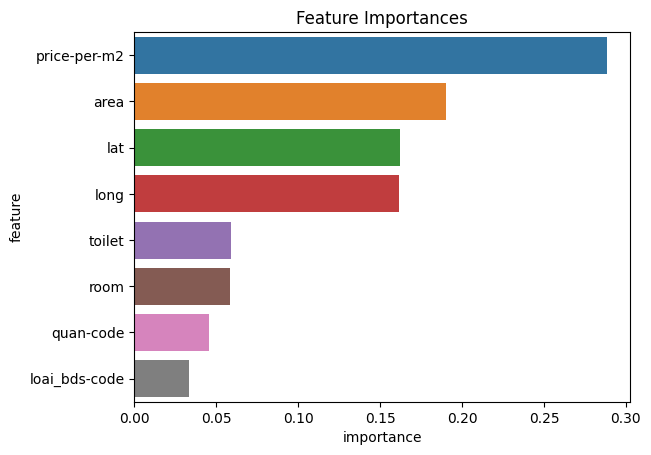

In [55]:
x = df.drop('price-VND', axis=1)
y = df['price-VND']
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

# Fit RandomForest model
rf = RandomForestClassifier()
rf.fit(X_train, y_train)

# lấy đặc trưng quan trọng
importances = pd.DataFrame({'feature': X_train.columns, 'importance': rf.feature_importances_})
importances = importances.sort_values('importance', ascending=False)

# Plot
sns.barplot(x='importance', y='feature', data=importances)
plt.title('Feature Importances')
plt.show()

In [57]:
df.to_csv('data.csv',index=False)
df

,area,room,toilet,price-VND,quan-code,loai_bds-code,price-per-m2,lat,long
69,1,1,1,79000000,4,1,7.900000e+07,15.99582,108.26936
77,3,0,0,258000000,3,7,8.600000e+07,16.10610,108.13558
90,25,1,1,500000000,5,4,2.000000e+07,16.05679,108.24132
99,24,1,1,540000000,5,0,2.250000e+07,16.05762,108.23751
103,22,0,1,550000000,5,0,2.500000e+07,16.05762,108.23751
...,...,...,...,...,...,...,...,...,...
7391,960,0,0,180000000000,5,16,1.875000e+08,16.05655,108.24693
7395,1454,0,0,220000000000,2,16,1.513067e+08,16.08562,108.21912
7397,1200,0,0,240000000000,5,9,2.000000e+08,16.08521,108.24371
7410,3200,0,0,560000000000,5,9,1.750000e+08,16.05655,108.24693
